## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [6]:
import pandas as pd

In [15]:
## Data Ingestions step
df=pd.read_csv('gemstone.csv')
df=df.head(12000)

In [16]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
### No missing values present in the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       12000 non-null  int64  
 1   carat    12000 non-null  float64
 2   cut      12000 non-null  object 
 3   color    12000 non-null  object 
 4   clarity  12000 non-null  object 
 5   depth    12000 non-null  float64
 6   table    12000 non-null  float64
 7   x        12000 non-null  float64
 8   y        12000 non-null  float64
 9   z        12000 non-null  float64
 10  price    12000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.0+ MB


In [19]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
## check for duplicated records
df.duplicated().sum()

0

In [21]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical_columns:",numerical_columns)
print("Categorical columns:",categorical_columns)

Numerical_columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [22]:
df[categorical_columns].describe()

,cut,color,clarity
count,12000,12000,12000
unique,5,7,8
top,Ideal,G,SI1
freq,5769,2788,3260


In [23]:
df['cut'].value_counts()

cut
Ideal        5769
Premium      3122
Very Good    2278
Good          699
Fair          132
Name: count, dtype: int64

In [24]:
df['color'].value_counts()

color
G    2788
E    2196
F    2068
H    1944
D    1552
I    1091
J     361
Name: count, dtype: int64

In [25]:
df['clarity'].value_counts()

clarity
SI1     3260
VS2     2935
SI2     1922
VS1     1912
VVS2    1001
VVS1     658
IF       275
I1        37
Name: count, dtype: int64

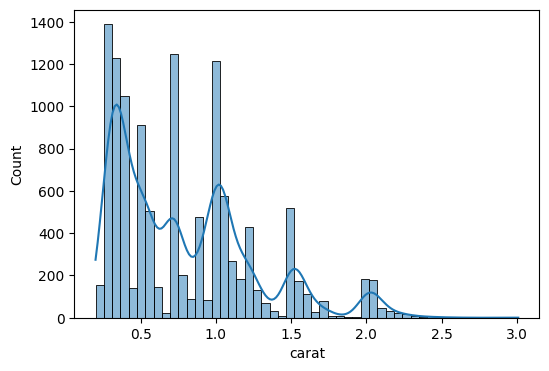

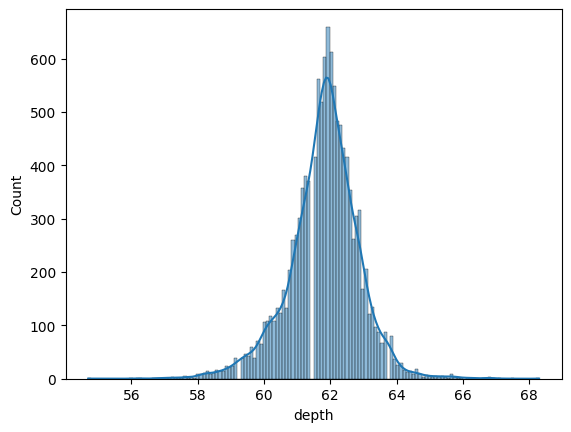

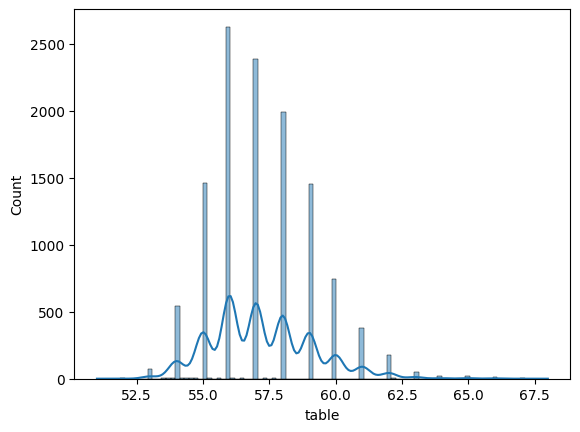

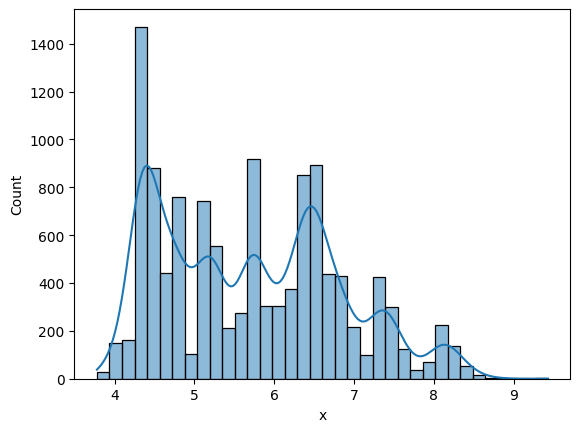

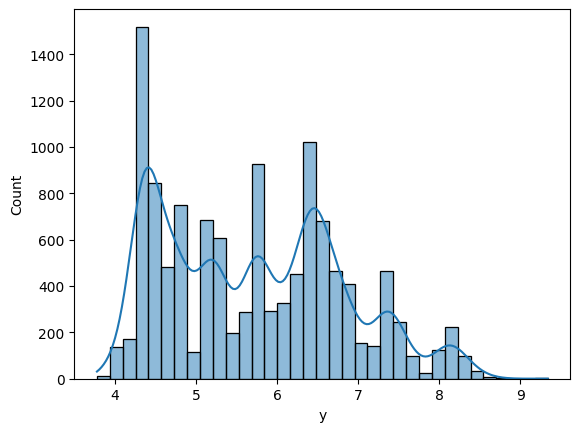

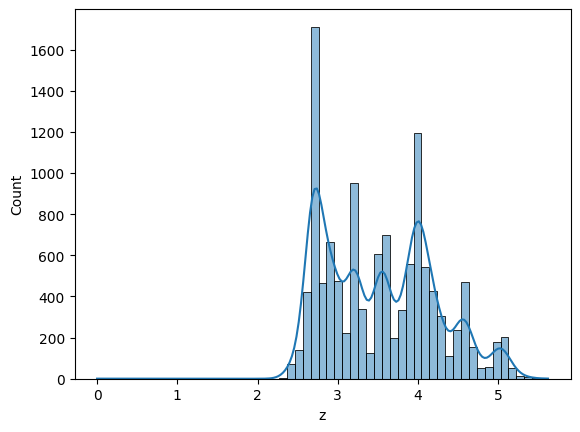

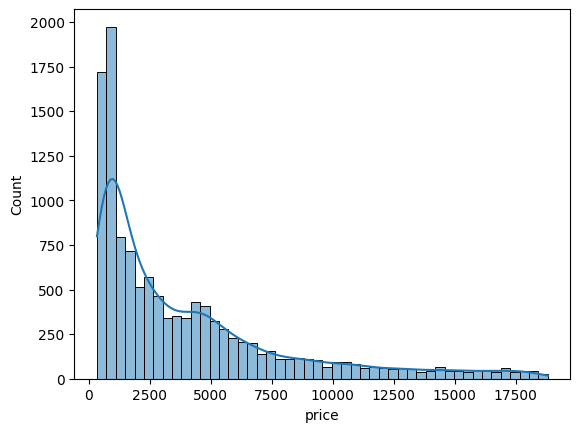

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

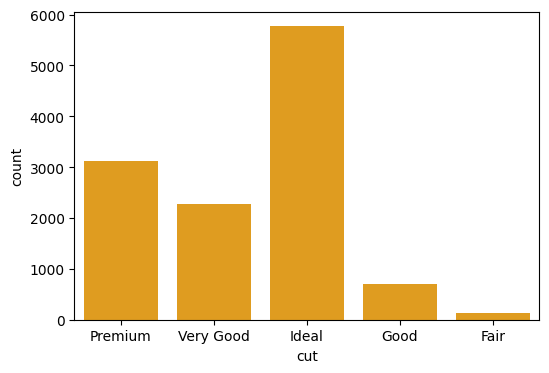

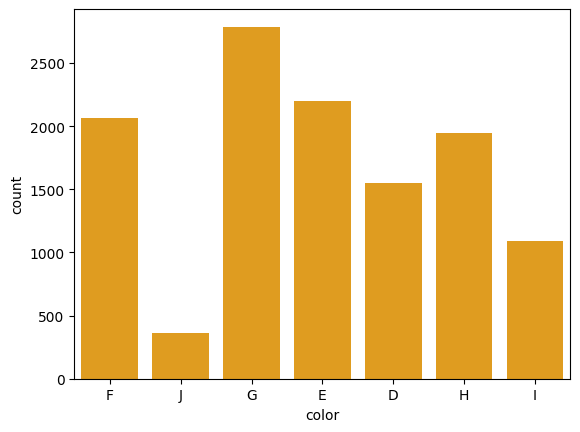

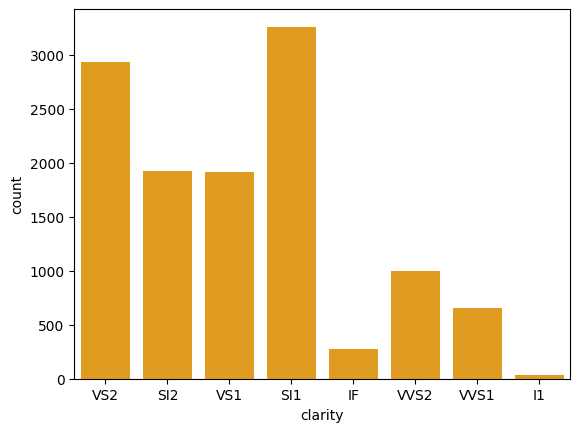

In [39]:
## Assignment Do the same for categorical data
plt.figure(figsize=(6,4))
x=0
for i in categorical_columns:
    sns.countplot(data =df,x=i,color='orange')
    print('\n')
    plt.show()

<Axes: >

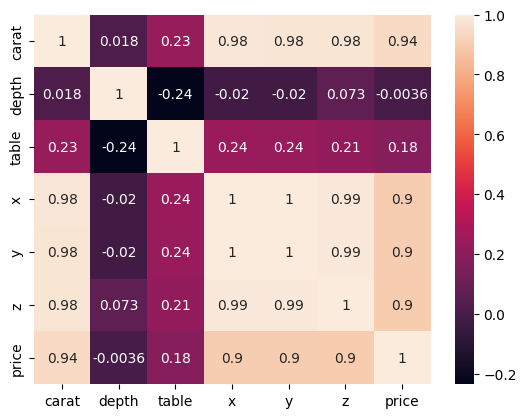

In [41]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

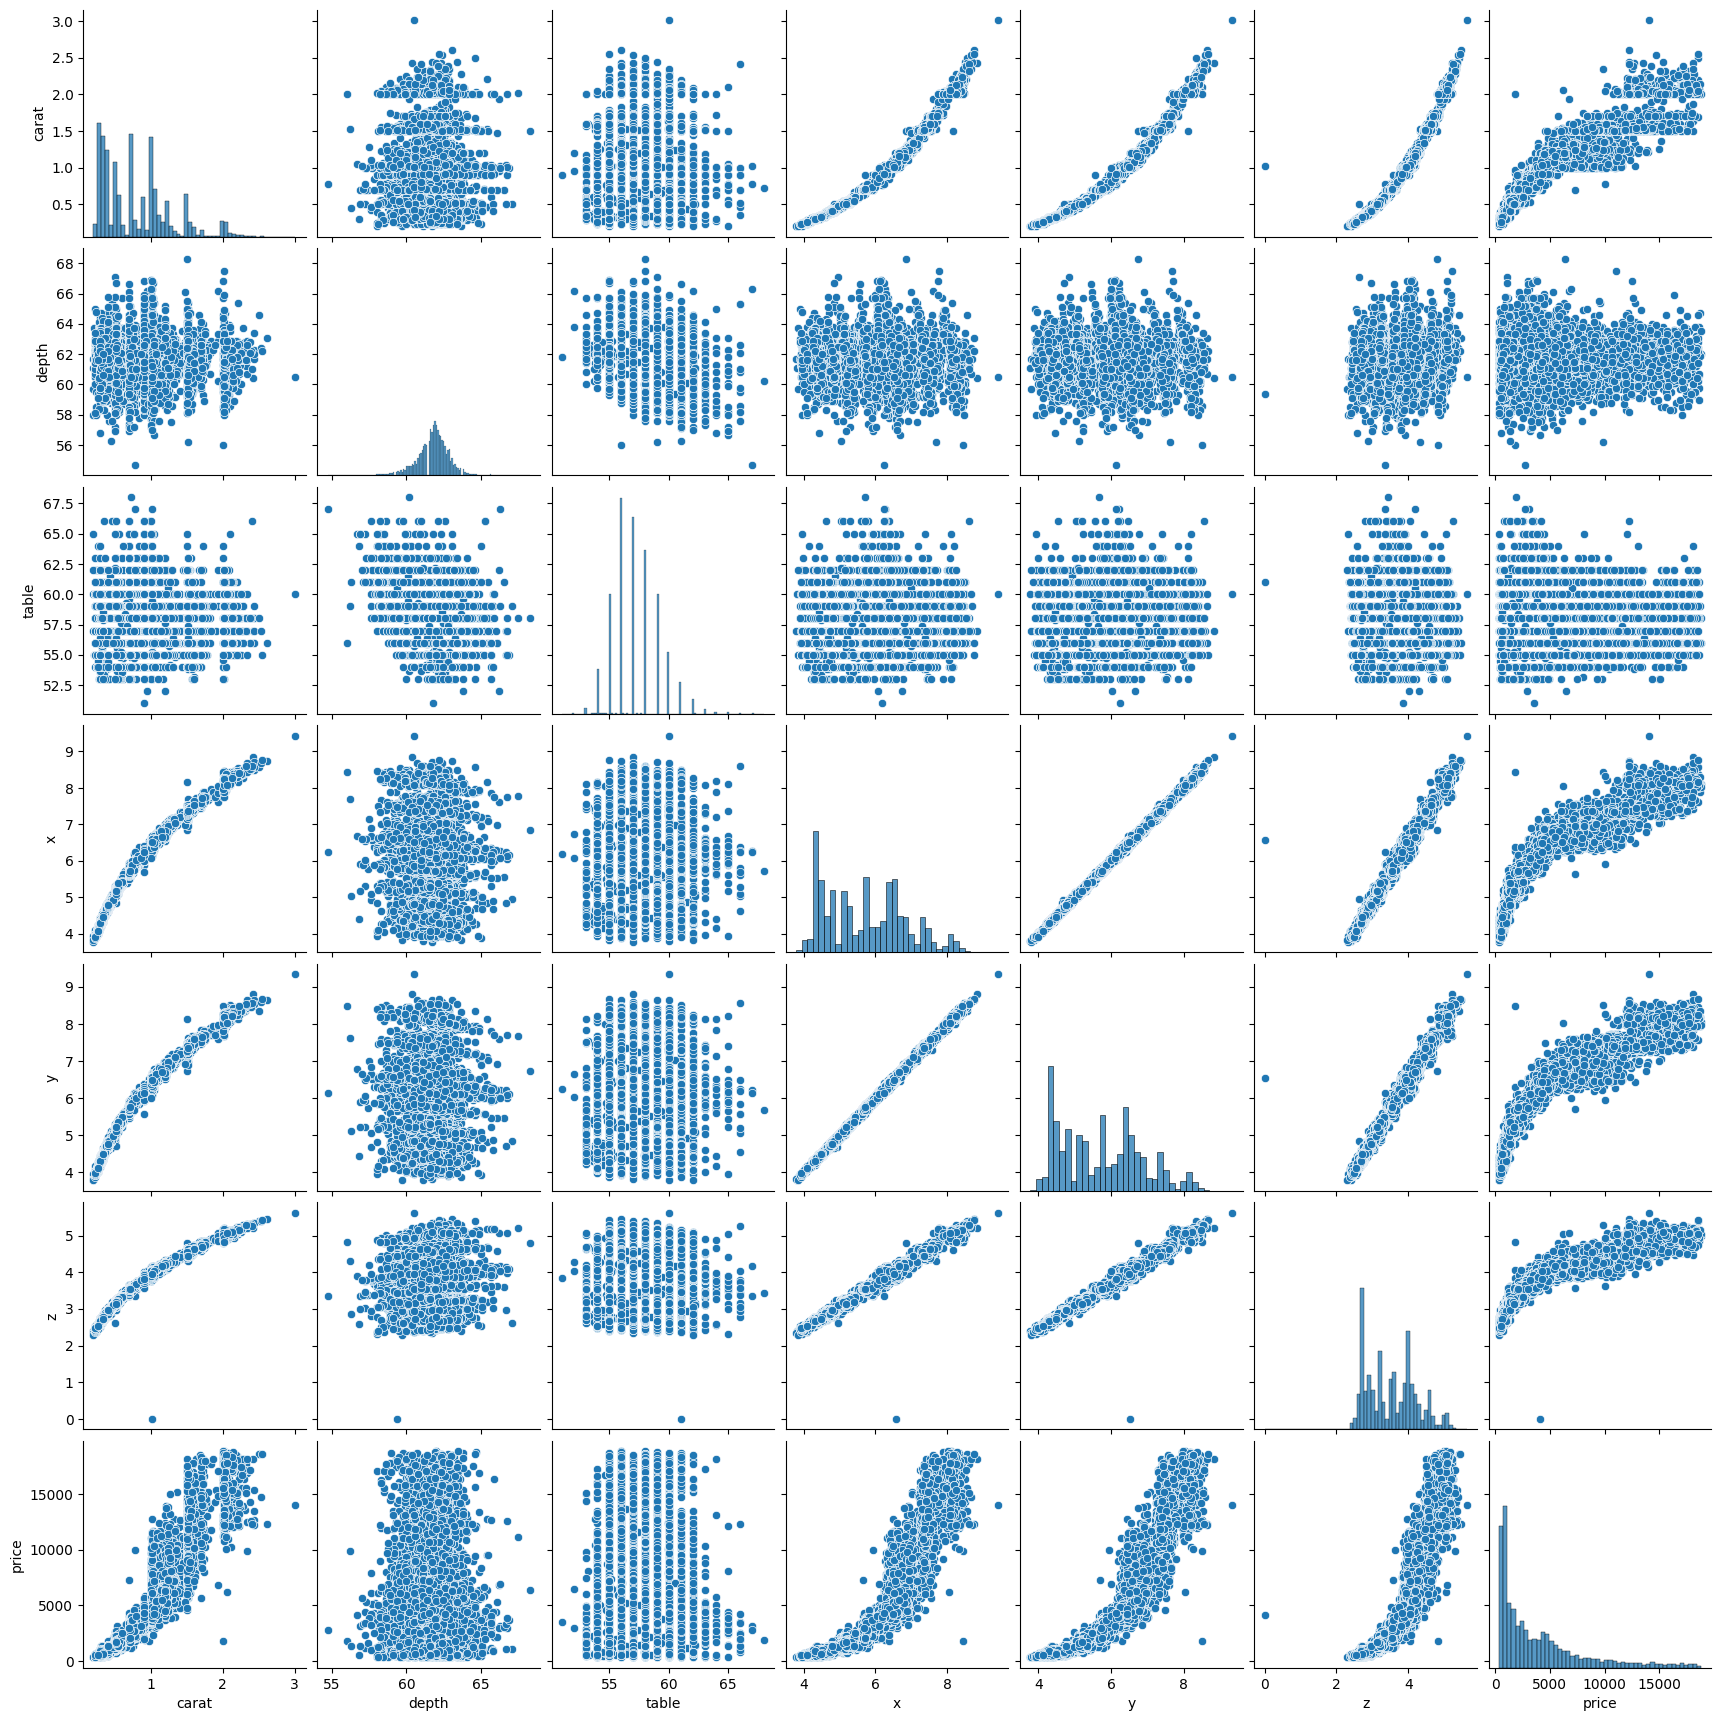

In [42]:
sns.pairplot(df)

In [28]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


In [43]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [44]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [45]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [46]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [47]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [48]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [49]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [50]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [51]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
